In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

Loading dataset

In [2]:
iris = datasets.load_iris()

In [10]:
type(iris)

sklearn.utils.Bunch

In [11]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

plotting data points 

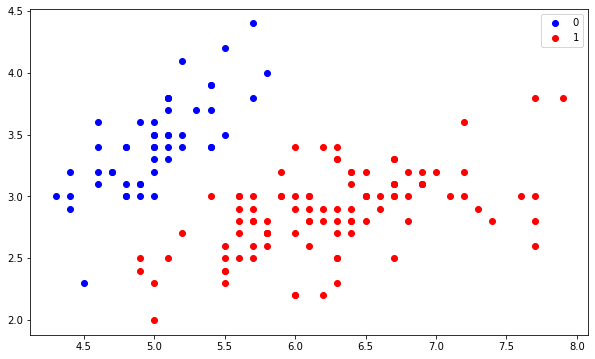

In [15]:
# plotting data points 
'''It contains 3 classes of 50 instances each, where each class refers to a type of iris plant'''
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

Grabbing all together (logistic regression usinf numpy)

In [16]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    '''By calling the sigmoid function we get the probability that some input x belongs to class 1. 
        Let’s take all probabilities ≥ 0.5 = class 1 and all probabilities < 0 = class 0. 
        This threshold should be defined depending on the business problem we were working'''

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

Evaluation

In [17]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [18]:
%time model.fit(X, y) # fitting model 

CPU times: user 15.5 s, sys: 2.33 ms, total: 15.5 s
Wall time: 15.6 s


In [19]:
# predictions
preds = model.predict(X)
(preds == y).mean()

1.0

In [20]:
'''a learning rate = 0.1 and number of iterations = 300000 the algorithm classified all instances successfully and resulting weights are'''
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

Plotting results (classification line)

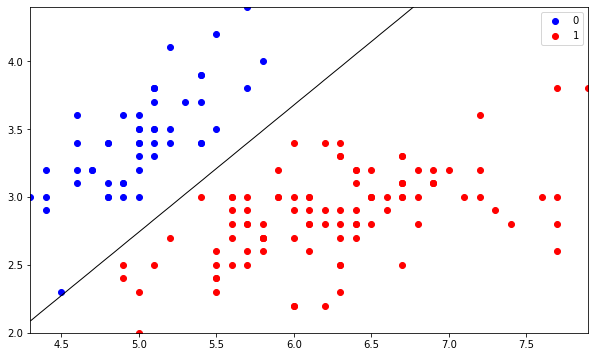

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

Logistic regression from sklearn

In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression(C=1e20)
%time model.fit(X, y)

CPU times: user 18.4 ms, sys: 1.08 ms, total: 19.5 ms
Wall time: 26.4 ms


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [26]:
model.intercept_, model.coef_

(array([-276.67727715]), array([[ 134.80324426, -147.37951668]]))

Thank You